In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from pmdarima import auto_arima
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)


# Load dataset
#df = pd.read_excel("Monday Prices.xlsx")

In [2]:
url = "https://raw.githubusercontent.com/Kanchan786786/Capstone_project-/refs/heads/main/Datasets/AAPL_1D.csv"
df = pd.read_csv(url)

In [3]:
df.head()

Price Week Date  Close  High   Low  Open       Volume  VWAP  \
0  1980-12-12       Fri   0.10  0.10  0.10  0.10  469033600.0  0.10   
1  1980-12-15       Mon   0.09  0.09  0.09  0.09  175884800.0  0.09   
2  1980-12-16       Tue   0.09  0.09  0.09  0.09  105728000.0  0.09   
3  1980-12-17       Wed   0.09  0.09  0.09  0.09   86441600.0  0.09   
4  1980-12-18       Thu   0.09  0.09  0.09  0.09   73449600.0  0.09   

   Adjusted Close    Market Cap  Bid Price  Ask Price  SMA_50  EMA_50  RSI  \
0            0.10  3.572854e+12     237.32     250.59     NaN     NaN  NaN   
1            0.09  3.572854e+12     237.32     250.59     NaN     NaN  NaN   
2            0.09  3.572854e+12     237.32     250.59     NaN     NaN  NaN   
3            0.09  3.572854e+12     237.32     250.59     NaN     NaN  NaN   
4            0.09  3.572854e+12     237.32     250.59     NaN     NaN  NaN   

   MACD  MACD_Signal  MACD_Hist  Target Variable - High  Target Variable - Low  
0   NaN          NaN        NaN                     NaN                    NaN  
1   NaN          NaN        NaN                     NaN                    NaN  
2   NaN          NaN        NaN                     NaN                    NaN  
3   NaN          NaN        NaN                     NaN                    NaN  
4   NaN          NaN        NaN                     NaN                    NaN

In [4]:
df.head().T

0                1                2  \
Price                        1980-12-12       1980-12-15       1980-12-16   
Week Date                           Fri              Mon              Tue   
Close                               0.1             0.09             0.09   
High                                0.1             0.09             0.09   
Low                                 0.1             0.09             0.09   
Open                                0.1             0.09             0.09   
Volume                      469033600.0      175884800.0      105728000.0   
VWAP                                0.1             0.09             0.09   
Adjusted Close                      0.1             0.09             0.09   
Market Cap              3572854423552.0  3572854423552.0  3572854423552.0   
Bid Price                        237.32           237.32           237.32   
Ask Price                        250.59           250.59           250.59   
SMA_50                              NaN              NaN              NaN   
EMA_50                              NaN              NaN              NaN   
RSI                                 NaN              NaN              NaN   
MACD                                NaN              NaN              NaN   
MACD_Signal                         NaN              NaN              NaN   
MACD_Hist                           NaN              NaN              NaN   
Target Variable - High              NaN              NaN              NaN   
Target Variable - Low               NaN              NaN              NaN   

                                      3                4  
Price                        1980-12-17       1980-12-18  
Week Date                           Wed              Thu  
Close                              0.09             0.09  
High                               0.09             0.09  
Low                                0.09             0.09  
Open                               0.09             0.09  
Volume                       86441600.0       73449600.0  
VWAP                               0.09             0.09  
Adjusted Close                     0.09             0.09  
Market Cap              3572854423552.0  3572854423552.0  
Bid Price                        237.32           237.32  
Ask Price                        250.59           250.59  
SMA_50                              NaN              NaN  
EMA_50                              NaN              NaN  
RSI                                 NaN              NaN  
MACD                                NaN              NaN  
MACD_Signal                         NaN              NaN  
MACD_Hist                           NaN              NaN  
Target Variable - High              NaN              NaN  
Target Variable - Low               NaN              NaN

In [5]:
print(len(df.columns))

20


In [6]:
# 1. Basic Information
print("\nDataset Information:\n")
print(df.info())

# 2. Summary Statistics
print("\nSummary Statistics:\n")
print(df.describe())

# 3. Checking for Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   11124 non-null  object 
 1   Week Date               11124 non-null  object 
 2   Close                   11124 non-null  float64
 3   High                    11124 non-null  float64
 4   Low                     11124 non-null  float64
 5   Open                    11124 non-null  float64
 6   Volume                  11124 non-null  float64
 7   VWAP                    11124 non-null  float64
 8   Adjusted Close          11124 non-null  float64
 9   Market Cap              11124 non-null  float64
 10  Bid Price               11124 non-null  float64
 11  Ask Price               11124 non-null  float64
 12  SMA_50                  11075 non-null  float64
 13  EMA_50                  11075 non-null  float64
 14  RSI            

In [7]:
# 4. Checking for Duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [8]:
# Rename columns
new_columns = {col: col.replace(' ', '_').replace('Price', 'Date').replace('Week_Date', 'Day') for col in df.columns}
df = df.rename(columns=new_columns)

<Axes: xlabel='Date'>

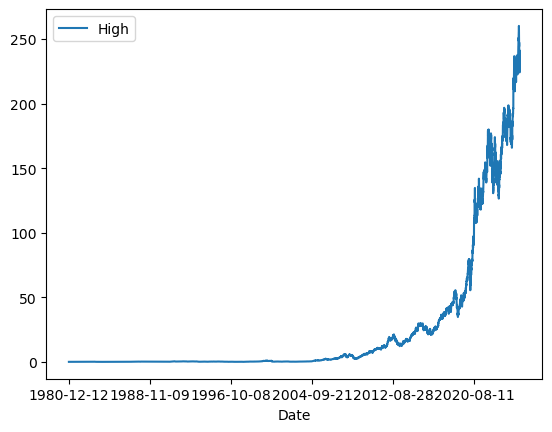

In [9]:
df.plot.line(y="High", use_index=True, x='Date')

In [10]:
print(df.columns)

Index(['Date', 'Day', 'Close', 'High', 'Low', 'Open', 'Volume', 'VWAP',
       'Adjusted_Close', 'Market_Cap', 'Bid_Date', 'Ask_Date', 'SMA_50',
       'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist',
       'Target_Variable_-_High', 'Target_Variable_-_Low'],
      dtype='object')


In [11]:
# Fill missing values at the start or end with column mean
df['SMA_50'].fillna(df['SMA_50'].mean(), inplace=True)
df['EMA_50'].fillna(df['EMA_50'].mean(), inplace=True)
df['RSI'].fillna(df['RSI'].mean(), inplace=True)
df['MACD'].fillna(df['MACD'].mean(), inplace=True)
df['MACD_Signal'].fillna(df['MACD_Signal'].mean(), inplace=True)
df['MACD_Hist'].fillna(df['MACD_Hist'].mean(), inplace=True)

# Remove unwanted columns
df.drop(columns=['Target_Variable_-_High', 'Target_Variable_-_Low'], inplace=True)

# Check for any remaining missing values
print(df.isnull().sum())

Date              0
Day               0
Close             0
High              0
Low               0
Open              0
Volume            0
VWAP              0
Adjusted_Close    0
Market_Cap        0
Bid_Date          0
Ask_Date          0
SMA_50            0
EMA_50            0
RSI               0
MACD              0
MACD_Signal       0
MACD_Hist         0
dtype: int64


In [12]:
# Check rows with missing values
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Date, Day, Close, High, Low, Open, Volume, VWAP, Adjusted_Close, Market_Cap, Bid_Date, Ask_Date, SMA_50, EMA_50, RSI, MACD, MACD_Signal, MACD_Hist]
Index: []


In [13]:
df.tail()

Date  Day   Close    High     Low     Open      Volume     VWAP  \
11119  2025-01-24  Fri  222.78  225.63  221.41  224.780  54697900.0  223.273   
11120  2025-01-27  Mon  229.86  232.15  223.98  224.020  94863400.0  228.663   
11121  2025-01-28  Tue  238.26  240.19  230.81  230.850  75707600.0  236.420   
11122  2025-01-29  Wed  239.36  239.86  234.01  234.120  45375500.0  237.743   
11123  2025-01-30  Thu  237.59  240.79  237.21  238.665  44801575.0  238.530   

       Adjusted_Close    Market_Cap  Bid_Date  Ask_Date   SMA_50   EMA_50  \
11119          222.78  3.572850e+12    237.32    250.59  239.143  237.067   
11120          229.86  3.572850e+12    237.32    250.59  239.255  236.784   
11121          238.26  3.572850e+12    237.32    250.59  239.536  236.842   
11122          239.36  3.572850e+12    237.32    250.59  239.821  236.941   
11123          237.59  3.572850e+12    237.32    250.59  240.008  236.966   

          RSI   MACD  MACD_Signal  MACD_Hist  
11119  30.770 -5.564       -3.171     -2.393  
11120  42.207 -5.228       -3.583     -1.645  
11121  52.280 -4.235       -3.713     -0.522  
11122  53.425 -3.321       -3.635      0.314  
11123  51.293 -2.708       -3.449      0.741


Data Types:

Date               object
Day                object
Close             float64
High              float64
Low               float64
Open              float64
Volume            float64
VWAP              float64
Adjusted_Close    float64
Market_Cap        float64
Bid_Date          float64
Ask_Date          float64
SMA_50            float64
EMA_50            float64
RSI               float64
MACD              float64
MACD_Signal       float64
MACD_Hist         float64
dtype: object


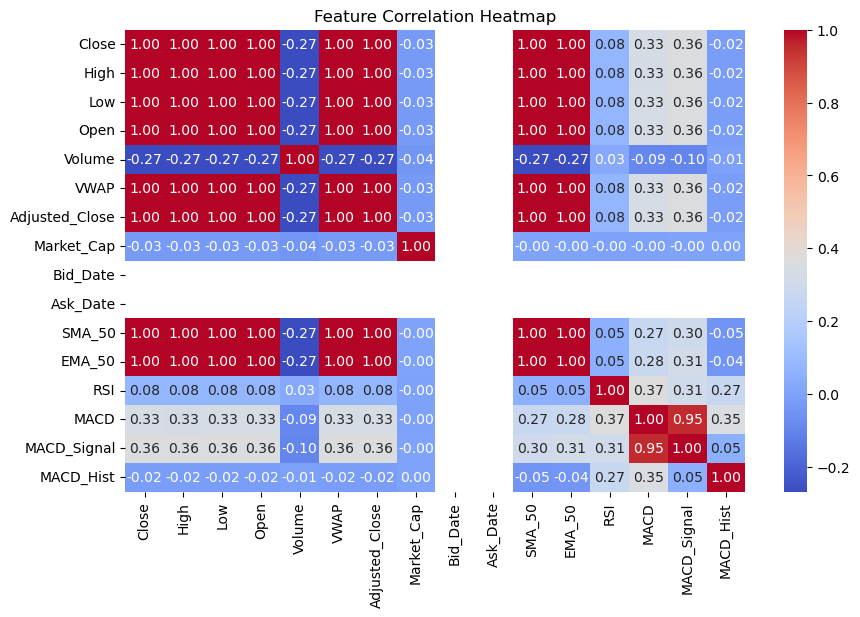

In [14]:
import matplotlib.pyplot as plt

# 5. Data Type Inspection
print("\nData Types:\n")
print(df.dtypes)

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

#7. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
# Keep only the 'Date' and 'high' columns
df = df[['Date', 'High']]

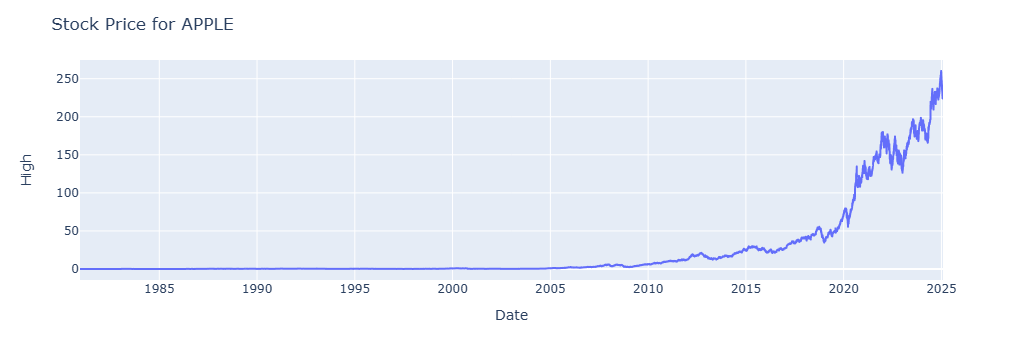

In [16]:
import plotly.express as px 
# Create the line plot
fig1 = px.line(df, x='Date', y='High')
# Set the title using the ticker value
fig1.update_layout(title=f"Stock Price for APPLE")
# Display the plot
fig1.show()

In [17]:
# Run Dicky-Fuller test to check the dataset is stationary or non stationary 
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.High.dropna())
print(f"ADF Statistics:{result[0]}")
print(f"p-value:{result[1]}")

ADF Statistics:4.670335255751342
p-value:1.0


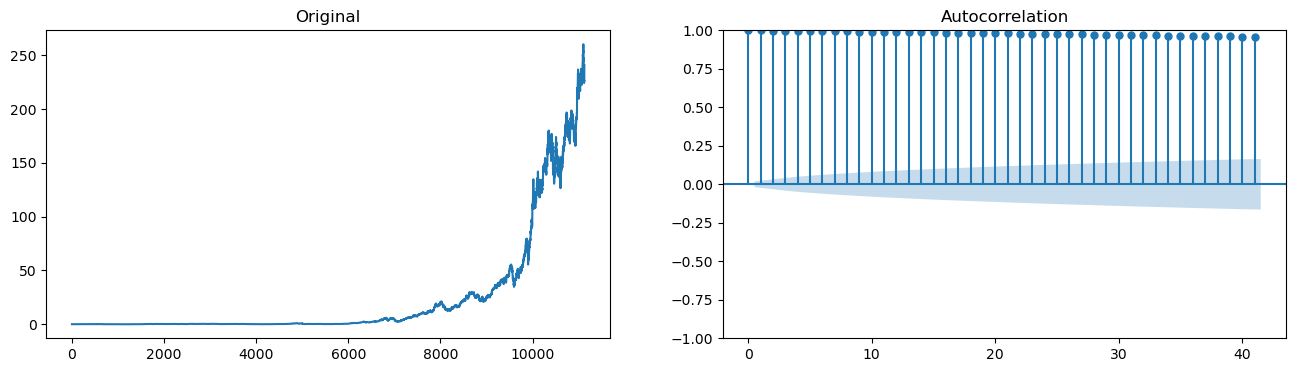

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf # Import the plot_acf function

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.High)
ax1.set_title("Original")
#add ; at the end of the plot function so that the plot is not duplicated
plot_acf(df.High, ax=ax2); # Now plot_acf is defined and can be used

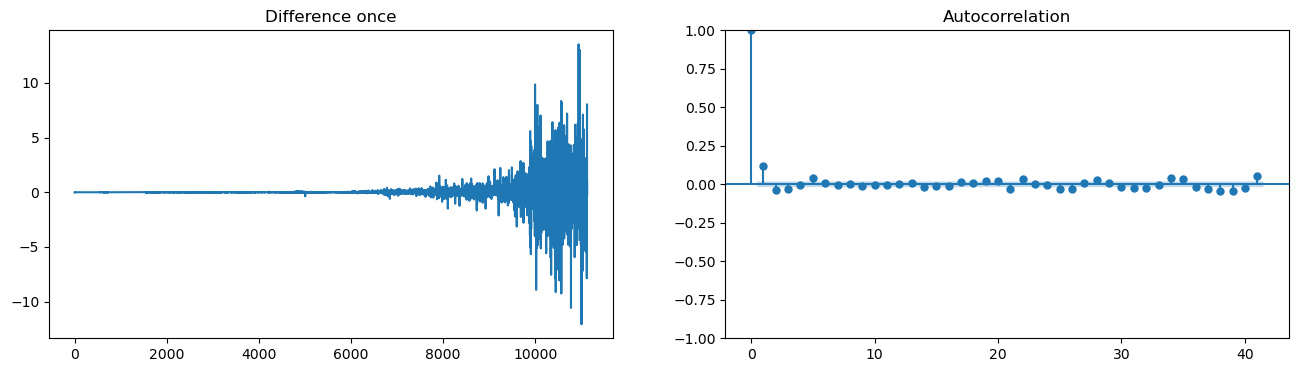

In [19]:
diff = df.High.diff().dropna()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff,ax=ax2);

In [20]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [21]:
#pipenv install --skip-lock pmdarima
from pmdarima.arima.utils import ndiffs

ndiffs(df.High, test="adf")

1

Then d value is 1

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf

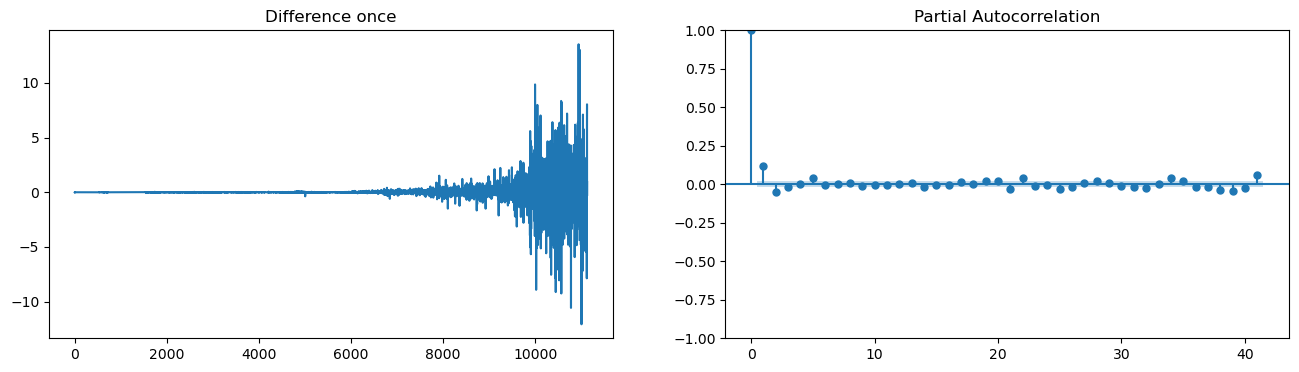

In [24]:
diff =df.High.diff().dropna()

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

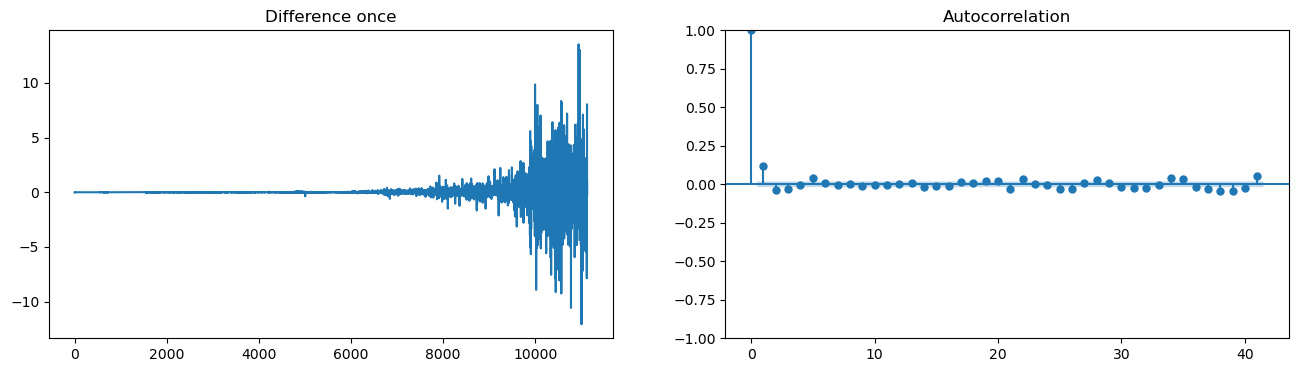

In [25]:
diff =df.High.diff().dropna()

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

# fitting the Arima model

## Based on the results p=1 and q=1 and d=1

In [28]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
import logging
logging.getLogger("statsmodels").setLevel(logging.ERROR)

In [29]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(df['High'], order=(1, 1, 1))

# Fit the model
result = model.fit()

In [30]:
# Print model summary
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                11124
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13840.336
Date:                Sat, 01 Mar 2025   AIC                          27686.671
Time:                        18:14:58   BIC                          27708.621
Sample:                             0   HQIC                         27694.062
                              - 11124                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1785      0.024     -7.523      0.000      -0.225      -0.132
ma.L1          0.3028      0.023     13.005      0.000       0.257       0.348
sigma2         0.7052      0.002    350.290      0.0

(array([7.02088469e-05, 2.80835388e-04, 8.77610587e-04, 5.75712545e-03,
        3.60978787e-01, 1.88510754e-02, 2.98387600e-03, 4.91461929e-04,
        1.40417694e-04, 7.02088469e-05]),
 array([-12.22324895,  -9.66244002,  -7.1016311 ,  -4.54082217,
         -1.98001324,   0.58079568,   3.14160461,   5.70241353,
          8.26322246,  10.82403138,  13.38484031]),
 <BarContainer object of 10 artists>)

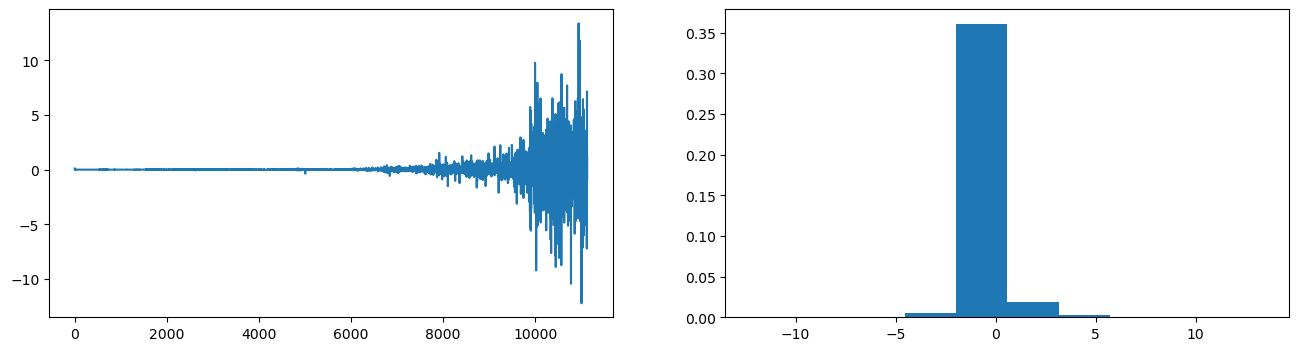

In [31]:
#residuals
residuals = pd.DataFrame(result.resid)
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals, density=True)

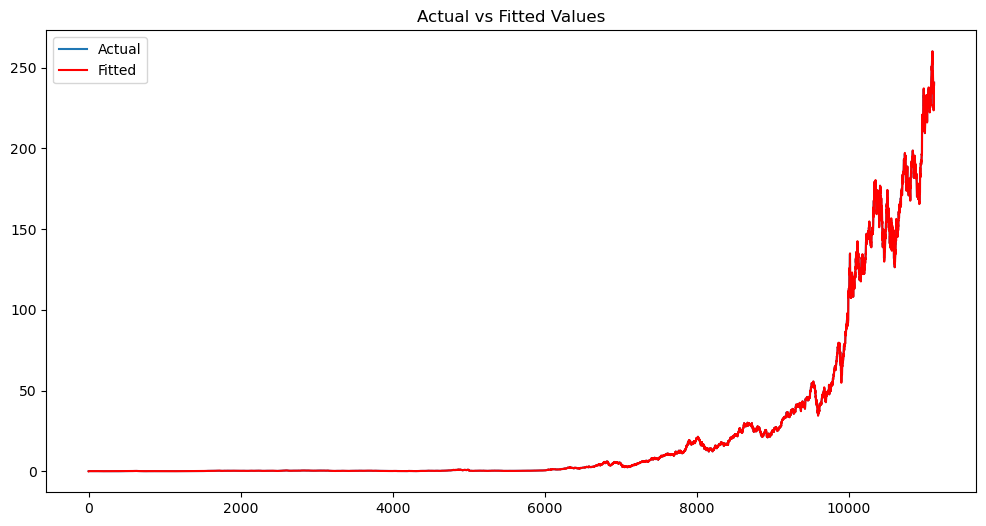

In [32]:
#actual vs Fitted

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Actual')
plt.plot(result.fittedvalues, label='Fitted', color='red')
plt.title("Actual vs Fitted Values")
plt.legend()
plt.show()

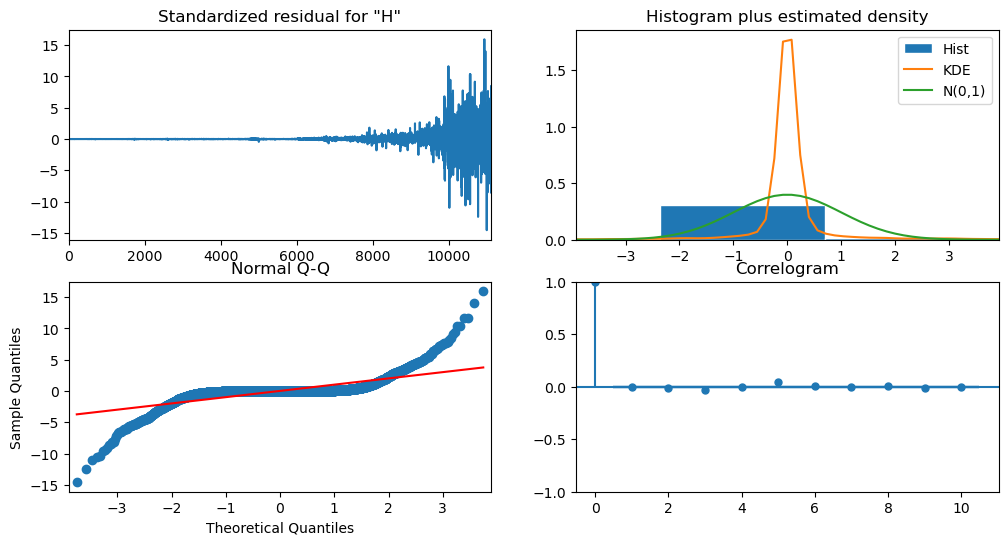

In [33]:
import matplotlib.pyplot as plt

result.plot_diagnostics(figsize=(12, 6))
plt.show()

In [34]:
aic_score = result.aic
print(f"AIC Score: {aic_score}")

AIC Score: 27686.671111585856


In [35]:
bic_score = result.bic
print(f"BIC Score: {bic_score}")

BIC Score: 27708.621422532633


In [36]:
import numpy as np

# Assuming df['target_variable'] is your actual values
fitted_values = result.fittedvalues
residuals = df['High'] - fitted_values
rmse = np.sqrt(np.mean(residuals**2))
print(f"RMSE: {rmse}")

RMSE: 0.839721635678273


In [37]:
from sklearn.metrics import r2_score

r2 = r2_score(df['High'], result.fittedvalues)
print(f"R-squared: {r2}")

R-squared: 0.999727588428757


In [38]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(result.resid, lags=[10], return_df=True)
print(f"Ljung-Box Test: {lb_test}")

Ljung-Box Test:      lb_stat  lb_pvalue
10  32.04732   0.000393


In [39]:
# Ensure y has no NaN values
y = result.fittedvalues.dropna()

# Align X with y
X = df.loc[y.index, 'High']

# Check if they now match
print(X.shape, y.shape)

(11124,) (11124,)


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual vs Fitted values
y_actual = X
y_pred = y

# R-squared
r2 = r2_score(y_actual, y_pred)
print(f"R-squared: {r2}")

# Mean Absolute Error
mae = mean_absolute_error(y_actual, y_pred)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error
mse = mean_squared_error(y_actual, y_pred)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.999727588428757
Mean Absolute Error: 0.26505609432476956
Mean Squared Error: 0.7051324254261941
Root Mean Squared Error: 0.839721635678273


In [41]:
# Let split the dataset and the run the ARIMAX model

In [42]:
n = int(len(df) * 0.8)
train = df.High[:n]
test = df.High[n:]

In [43]:
print(len(train))
print(len(test))

8899
2225


In [44]:
train.head()

0    0.10
1    0.09
2    0.09
3    0.09
4    0.09
Name: High, dtype: float64

In [45]:
# Define the ARIMA model
model = ARIMA(train, order=(1, 1, 1))

# Fit the model
result = model.fit()

In [46]:
# Print model summary
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 8899
Model:                 ARIMA(1, 1, 1)   Log Likelihood                7377.255
Date:                Sat, 01 Mar 2025   AIC                         -14748.510
Time:                        18:15:06   BIC                         -14727.229
Sample:                             0   HQIC                        -14741.264
                               - 8899                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1992      0.025     -8.102      0.000      -0.247      -0.151
ma.L1          0.3436      0.023     14.633      0.000       0.298       0.390
sigma2         0.0112    3.7e-05    301.345      0.0

In [47]:
step =30
fc = result.forecast(step)  # Forecasted values only

#fc, se, conf = result.forecast(step)

In [48]:
fc, conf = result.forecast(step)[:2]  # Extract first two elements

In [49]:
print(fc)
print(conf)

24.188407977897583
24.186932358286654


In [50]:
print(type(conf))  # Check if it's a float, list, or numpy array
print(conf)        # See the actual value

<class 'float'>
24.186932358286654


In [51]:
step = 30
forecast_output = result.get_forecast(steps=step)
print(forecast_output)

In [52]:
forecast_values = forecast_output.predicted_mean
forecast_index = pd.date_range(start="2025-01-31", periods=30, freq="D")
#print(forecast_values)
print(forecast_index)

DatetimeIndex(['2025-01-31', '2025-02-01', '2025-02-02', '2025-02-03',
               '2025-02-04', '2025-02-05', '2025-02-06', '2025-02-07',
               '2025-02-08', '2025-02-09', '2025-02-10', '2025-02-11',
               '2025-02-12', '2025-02-13', '2025-02-14', '2025-02-15',
               '2025-02-16', '2025-02-17', '2025-02-18', '2025-02-19',
               '2025-02-20', '2025-02-21', '2025-02-22', '2025-02-23',
               '2025-02-24', '2025-02-25', '2025-02-26', '2025-02-27',
               '2025-02-28', '2025-03-01'],
              dtype='datetime64[ns]', freq='D')


In [53]:
# Ensure y has no NaN values
y = result.fittedvalues.dropna()

# Align X with y
X = df.loc[y.index, 'High']

# Check if they now match
print(X.shape, y.shape)

(8899,) (8899,)


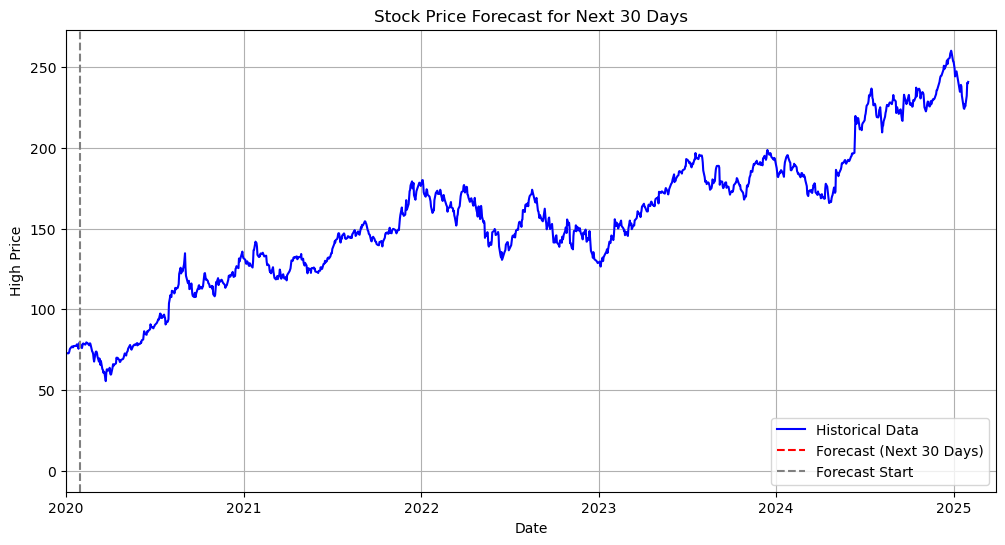

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Get forecasted values and ensure their index is in datetime format
forecast_values = forecast_output.predicted_mean
forecast_index = pd.to_datetime(forecast_values.index)  # Convert to datetime

# Create the plot
plt.figure(figsize=(12, 6))

# Plot historical data (only recent years for better visualization)
plt.plot(df['Date'], df['High'], label="Historical Data", color="blue")

# Ensure forecast data is available before plotting
if not forecast_values.empty:
    plt.plot(forecast_index, forecast_values, label="Forecast (Next 30 Days)", color="red", linestyle="dashed")

# Highlight forecast start date (Jan 31, 2025)
plt.axvline(x=pd.to_datetime("2020-01-31"), color='gray', linestyle='--', label="Forecast Start")

# Adjust x-axis limits to focus on recent years
plt.xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2025-03-28"))

# Labels and title
plt.xlabel("Date")
plt.ylabel("High Price")
plt.title("Stock Price Forecast for Next 30 Days")
plt.legend()
plt.grid()

plt.show()

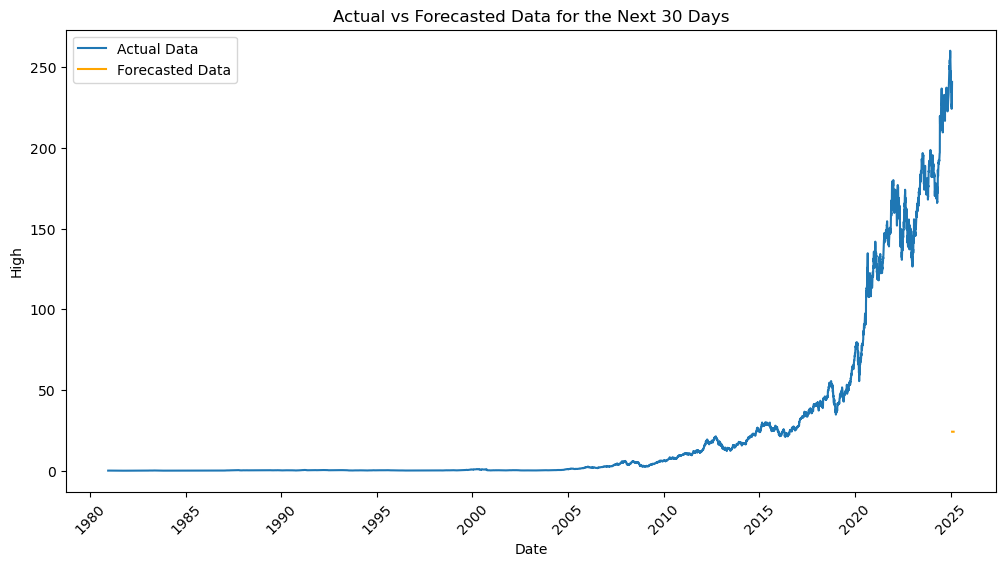

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# forecast_output is the result of the ARIMAX model's forecasting

# Generate forecasted dates
forecast_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Plot actual data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label='Actual Data')  # Actual data
plt.plot(forecast_dates, forecast_output.predicted_mean, label='Forecasted Data', color='orange')  # Forecasted data
plt.legend()
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Actual vs Forecasted Data for the Next 30 Days')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()

In [56]:
# Ensure y has no NaN values
y = result.fittedvalues.dropna()

# Align X with y
X = df.loc[y.index, 'High']

# Check if they now match
print(X.shape, y.shape)

(8899,) (8899,)


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual vs Fitted values
y_actual = X
y_pred = y

# R-squared
r2 = r2_score(y_actual, y_pred)
print(f"R-squared: {r2}")

# Mean Absolute Error
mae = mean_absolute_error(y_actual, y_pred)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error
mse = mean_squared_error(y_actual, y_pred)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.999757250828898
Mean Absolute Error: 0.03991533388149903
Mean Squared Error: 0.011152694999136507
Root Mean Squared Error: 0.10560632082946791


In [58]:
# Define the ARIMA model
model = ARIMA(train, order=(2, 1, 2))

# Fit the model
result = model.fit()

In [59]:
# Print model summary
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 8899
Model:                 ARIMA(2, 1, 2)   Log Likelihood                7380.927
Date:                Sat, 01 Mar 2025   AIC                         -14751.853
Time:                        18:15:11   BIC                         -14716.385
Sample:                             0   HQIC                        -14739.777
                               - 8899                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2620      0.115     -2.284      0.022      -0.487      -0.037
ar.L2         -0.2001      0.036     -5.560      0.000      -0.271      -0.130
ma.L1          0.4036      0.115      3.518      0.0

**Conclusion:**  

**Overall Model Accuracy:** The combination of an extremely high R-squared, low MAE, low MSE, and low RMSE indicates that your ARIMAX model is performing very well after tuning. It is making highly accurate predictions with very small errors.

**Model Fit:** The high R-squared value (close to 1) indicates that the model explains almost all the variance in the data, suggesting it is fitting the data well.

**Prediction Accuracy:** The low error metrics (MAE, MSE, RMSE) further confirm that the model is making accurate predictions.

Thus, after tuning, the ARIMAX model shows excellent predictive accuracy, which is a strong indicator that your model is well-suited for forecasting the High values

## SARIMAX MODEL

In [62]:
# Refit the SARIMAX model with the best parameters
model_sarimax = sm.tsa.statespace.SARIMAX(df['High'], 
                                          order=(0, 1, 1), 
                                          seasonal_order=(1, 1, 1, 7))
results_sarimax = model_sarimax.fit()

# Check the summary of the model
print(results_sarimax.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              High   No. Observations:                11124
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -13859.605
Date:                           Sat, 01 Mar 2025   AIC                          27727.210
Time:                                   18:15:27   BIC                          27756.475
Sample:                                        0   HQIC                         27737.064
                                         - 11124                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1268      0.003     47.258      0.000       0.122       0.132
ar.S.L7       -0.0043      0.003     -1.236

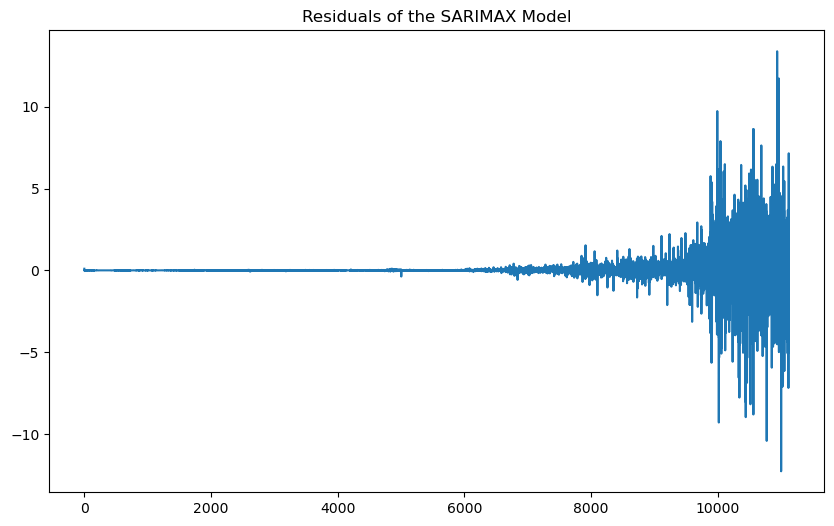

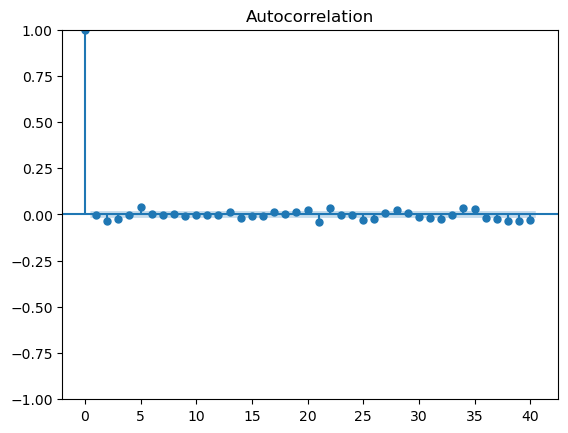

In [63]:
import matplotlib.pyplot as plt

# Plot residuals
residuals = results_sarimax.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the SARIMAX Model')
plt.show()

# Plot the ACF (Autocorrelation) of residuals to check for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=40)
plt.show()

In [64]:
# AIC, BIC, and other metrics
print(f"AIC: {results_sarimax.aic}")
print(f"BIC: {results_sarimax.bic}")

AIC: 27727.21035042103
BIC: 27756.474913584483


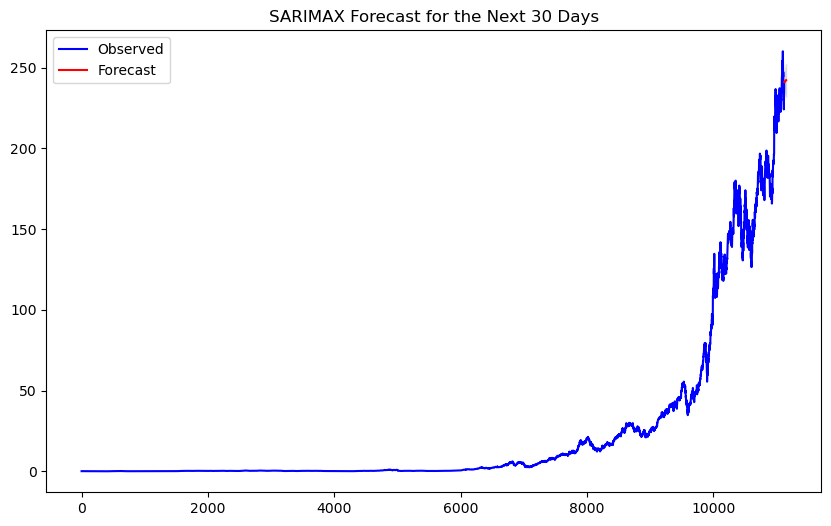

In [65]:
# Forecasting the next 30 periods (days)
forecast_steps = 30
forecast = results_sarimax.get_forecast(steps=forecast_steps)

# Get confidence intervals for the forecast
conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['High'], label='Observed', color='blue')  # Observed data
plt.plot(forecast.predicted_mean, label='Forecast', color='red')  # Forecasted data
plt.fill_between(forecast.predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.2)  # Confidence interval
plt.title('SARIMAX Forecast for the Next 30 Days')
plt.legend()
plt.show()

In [66]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math


# Ensure 'High' column exists
if 'High' not in df.columns:
    raise KeyError("Column 'High' not found in the dataset.")

# Split data into train and test
split_ratio = 0.9
split_point = int(len(df) * split_ratio)
train = df[['High']].iloc[:split_point]  # Keep as DataFrame
test = df[['High']].iloc[split_point:]   # Keep as DataFrame

# Define orders from hyperparameter tuning results
arimax_order = (2, 1, 2)
sarimax_order = (0, 1, 1)
seasonal_order = (1, 1, 1, 52)  # Weekly data with annual seasonality

# Fit ARIMAX Model (no seasonal component)
model_arimax = sm.tsa.statespace.SARIMAX(train['High'], order=arimax_order)
results_arimax = model_arimax.fit(disp=False)
forecast_arimax = results_arimax.get_forecast(steps=len(test))
pred_arimax = forecast_arimax.predicted_mean

# Fit SARIMAX Model (with seasonal component)
model_sarimax = sm.tsa.statespace.SARIMAX(train['High'], order=sarimax_order, seasonal_order=seasonal_order)
results_sarimax = model_sarimax.fit(disp=False)
forecast_sarimax = results_sarimax.get_forecast(steps=len(test))
pred_sarimax = forecast_sarimax.predicted_mean

# Compute Accuracy Metrics
def compute_metrics(true, pred):
    mae = mean_absolute_error(true, pred)
    rmse = math.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / true)) * 100
    return mae, rmse, mape

# Ensure test['High'] is accessed properly
mae_arimax, rmse_arimax, mape_arimax = compute_metrics(test['High'], pred_arimax)
mae_sarimax, rmse_sarimax, mape_sarimax = compute_metrics(test['High'], pred_sarimax)

# Print accuracy metrics
print("ARIMAX Metrics:")
print(f"MAE: {mae_arimax:.2f}, RMSE: {rmse_arimax:.2f}, MAPE: {mape_arimax:.2f}%\n")

print("SARIMAX Metrics:")
print(f"MAE: {mae_sarimax:.2f}, RMSE: {rmse_sarimax:.2f}, MAPE: {mape_sarimax:.2f}%")

ARIMAX Metrics:
MAE: 45.05, RMSE: 55.95, MAPE: 24.33%

SARIMAX Metrics:
MAE: 13.57, RMSE: 17.22, MAPE: 8.00%


ARIMAX is the better model in this case based on the AIC, BIC, Log Likelihood, and the lack of extreme residual issues. It fits the data better and is computationally more efficient than SARIMAX, which is overfitting the data due to the inclusion of seasonal components that may not be necessary.

SARIMAX would be better if there is strong seasonality or cyclical patterns in the stock data that were not immediately evident. However, the SARIMAX model's significantly higher AIC/BIC suggests that seasonality might not be playing a significant role in the dataset.

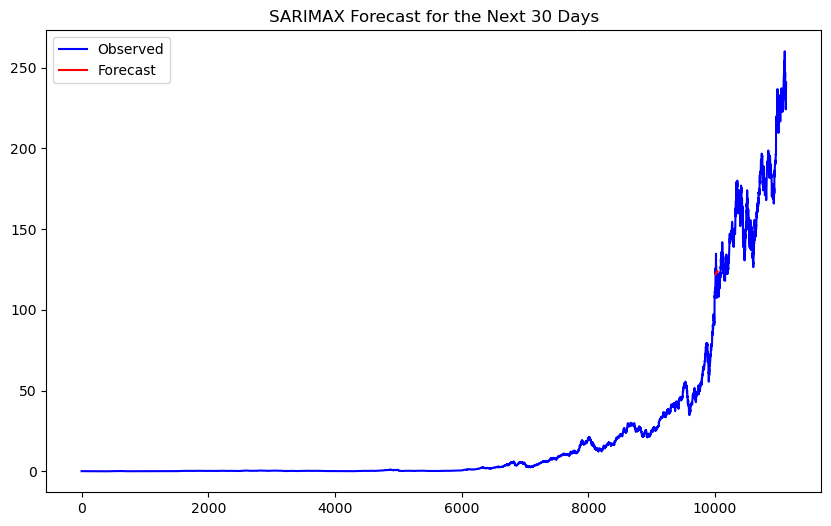

In [68]:
# Forecasting the next 30 periods (days)
forecast_steps = 30
forecast = results_sarimax.get_forecast(steps=forecast_steps)

# Get confidence intervals for the forecast
conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['High'], label='Observed', color='blue')  # Observed data
plt.plot(forecast.predicted_mean, label='Forecast', color='red')  # Forecasted data
plt.fill_between(forecast.predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.2)  # Confidence interval
plt.title('SARIMAX Forecast for the Next 30 Days')
plt.legend()
plt.show()

In [132]:
# Ensure y has no NaN values
y = result.fittedvalues.dropna()

# Align X with y
X = df.loc[y.index, 'High']

# Check if they now match
print(X.shape, y.shape)

(8899,) (8899,)


In [134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual vs Fitted values
y_actual = X
y_pred = y

# R-squared
r2 = r2_score(y_actual, y_pred)
print(f"R-squared: {r2}")

# Mean Absolute Error
mae = mean_absolute_error(y_actual, y_pred)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error
mse = mean_squared_error(y_actual, y_pred)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.9997574511463495
Mean Absolute Error: 0.03990108248126199
Mean Squared Error: 0.011143491756833193
Root Mean Squared Error: 0.10556273848680316


## Scaling the Dataset